In [1]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [2]:
qual_vec_file = "C:/Users/ctata/Documents/Lab/Microbiome_ASD_16S/Microbiome_ASD_16S/embeddings/glove_emb_AG_newfilter.07_100.txt"
qual_vecs = pd.read_csv(qual_vec_file, sep = " ", index_col = 0,header = None, dtype = {0:str})


In [3]:
kpcof = pd.read_csv("C:/Users/ctata/Documents/Lab/quality_vectors_final/data/annotations/kpcof_annotation.txt", sep = " ")

In [4]:
kpcof = kpcof.loc[[i in qual_vecs.index.values for i in kpcof.Seq], :]
qual_vecs = qual_vecs.loc[[i in kpcof.Seq for i in kpcof.index.values], :]
qual_vecs = qual_vecs.loc[kpcof.Seq, ]
kpcof = kpcof.set_index('Seq')

In [5]:
print(kpcof.shape)
print(qual_vecs.shape)

print(kpcof.shape)
print(qual_vecs.shape)
print(np.sum([i == j for i,j in zip(qual_vecs.index.values, kpcof.index.values)])) #cool

(26726, 6)
(26726, 100)
(26726, 6)
(26726, 100)
26726


In [11]:
qual_vecs.insert(2, "Phylum" , kpcof.Phylum)
qual_vecs.insert(2, "Class" , kpcof.Class)


ValueError: cannot insert Class, already exists

In [90]:
df = pd.DataFrame(np.zeros((len(names), len(names))))
df.index = names
df.columns = names
df.head()

,Proteobacteria,Bacteroidetes,Firmicutes,Verrucomicrobia,Actinobacteria,Fusobacteria,nan,Cyanobacteria/Chloroplast,Euryarchaeota,SR1,...,Deferribacteres,Thaumarchaeota,Chloroflexi,Planctomycetes,Gemmatimonadetes,Chlamydiae,Nitrospirae,candidate_division_WPS-1,Armatimonadetes,BRC1
Proteobacteria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bacteroidetes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Firmicutes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Verrucomicrobia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Actinobacteria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
from collections import Counter
#grouped = qual_vecs.groupby('Phylum')
names = [i for i in Counter(qual_vecs.Phylum).keys()]
used_names = []

for phylum1 in names:
    used_names.append(phylum1)
    for phylum2 in names:
        print(str(phylum1) + str(phylum2))
        tmp1 = qual_vecs.loc[qual_vecs.Phylum == phylum1]
        tmp2 = qual_vecs.loc[qual_vecs.Phylum == phylum2]
        tmp1 = tmp1.drop(["Phylum", "Class"], axis = 1)
        tmp2 = tmp2.drop(["Phylum", "Class"], axis = 1)
        df.loc[phylum1, phylum2] = np.mean(cdist(tmp1, tmp2, metric = 'cosine'))

ProteobacteriaProteobacteria
ProteobacteriaBacteroidetes
ProteobacteriaFirmicutes
ProteobacteriaVerrucomicrobia
ProteobacteriaActinobacteria
ProteobacteriaFusobacteria
Proteobacterianan
ProteobacteriaCyanobacteria/Chloroplast


c:\users\ctata\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\ctata\miniconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ProteobacteriaEuryarchaeota
ProteobacteriaSR1
ProteobacteriaLentisphaerae
ProteobacteriaSynergistetes
ProteobacteriaDeinococcus-Thermus
ProteobacteriaCandidatus_Saccharibacteria
ProteobacteriaElusimicrobia
ProteobacteriaSpirochaetes
ProteobacteriaTenericutes
ProteobacteriaAcidobacteria
ProteobacteriaDeferribacteres
ProteobacteriaThaumarchaeota
ProteobacteriaChloroflexi
ProteobacteriaPlanctomycetes
ProteobacteriaGemmatimonadetes
ProteobacteriaChlamydiae
ProteobacteriaNitrospirae
Proteobacteriacandidate_division_WPS-1
ProteobacteriaArmatimonadetes
ProteobacteriaBRC1
BacteroidetesProteobacteria
BacteroidetesBacteroidetes
BacteroidetesFirmicutes
BacteroidetesVerrucomicrobia
BacteroidetesActinobacteria
BacteroidetesFusobacteria
Bacteroidetesnan
BacteroidetesCyanobacteria/Chloroplast
BacteroidetesEuryarchaeota
BacteroidetesSR1
BacteroidetesLentisphaerae
BacteroidetesSynergistetes
BacteroidetesDeinococcus-Thermus
BacteroidetesCandidatus_Saccharibacteria
BacteroidetesElusimicrobia
Bacteroidete

Deinococcus-ThermusBacteroidetes
Deinococcus-ThermusFirmicutes
Deinococcus-ThermusVerrucomicrobia
Deinococcus-ThermusActinobacteria
Deinococcus-ThermusFusobacteria
Deinococcus-Thermusnan
Deinococcus-ThermusCyanobacteria/Chloroplast
Deinococcus-ThermusEuryarchaeota
Deinococcus-ThermusSR1
Deinococcus-ThermusLentisphaerae
Deinococcus-ThermusSynergistetes
Deinococcus-ThermusDeinococcus-Thermus
Deinococcus-ThermusCandidatus_Saccharibacteria
Deinococcus-ThermusElusimicrobia
Deinococcus-ThermusSpirochaetes
Deinococcus-ThermusTenericutes
Deinococcus-ThermusAcidobacteria
Deinococcus-ThermusDeferribacteres
Deinococcus-ThermusThaumarchaeota
Deinococcus-ThermusChloroflexi
Deinococcus-ThermusPlanctomycetes
Deinococcus-ThermusGemmatimonadetes
Deinococcus-ThermusChlamydiae
Deinococcus-ThermusNitrospirae
Deinococcus-Thermuscandidate_division_WPS-1
Deinococcus-ThermusArmatimonadetes
Deinococcus-ThermusBRC1
Candidatus_SaccharibacteriaProteobacteria
Candidatus_SaccharibacteriaBacteroidetes
Candidatus_Sac

GemmatimonadetesSynergistetes
GemmatimonadetesDeinococcus-Thermus
GemmatimonadetesCandidatus_Saccharibacteria
GemmatimonadetesElusimicrobia
GemmatimonadetesSpirochaetes
GemmatimonadetesTenericutes
GemmatimonadetesAcidobacteria
GemmatimonadetesDeferribacteres
GemmatimonadetesThaumarchaeota
GemmatimonadetesChloroflexi
GemmatimonadetesPlanctomycetes
GemmatimonadetesGemmatimonadetes
GemmatimonadetesChlamydiae
GemmatimonadetesNitrospirae
Gemmatimonadetescandidate_division_WPS-1
GemmatimonadetesArmatimonadetes
GemmatimonadetesBRC1
ChlamydiaeProteobacteria
ChlamydiaeBacteroidetes
ChlamydiaeFirmicutes
ChlamydiaeVerrucomicrobia
ChlamydiaeActinobacteria
ChlamydiaeFusobacteria
Chlamydiaenan
ChlamydiaeCyanobacteria/Chloroplast
ChlamydiaeEuryarchaeota
ChlamydiaeSR1
ChlamydiaeLentisphaerae
ChlamydiaeSynergistetes
ChlamydiaeDeinococcus-Thermus
ChlamydiaeCandidatus_Saccharibacteria
ChlamydiaeElusimicrobia
ChlamydiaeSpirochaetes
ChlamydiaeTenericutes
ChlamydiaeAcidobacteria
ChlamydiaeDeferribacteres
Ch

In [116]:
df.to_csv("../data/tree/adjacency_matrix.csv")

In [113]:
import networkx as nx
import numpy as np
import string
import pygraphviz

G = nx.from_numpy_matrix(df.as_matrix())
G = nx.drawing.nx_agraph.to_agraph(G)

ModuleNotFoundError: No module named 'pygraphviz'

In [134]:
i = 26000
tsne = TSNE(n_components=2).fit_transform(qual_vecs.iloc[0:i, :])
kpcof_plot = kpcof.iloc[0:i, :]

In [38]:
[i or j or k or l for i,j,k,l in zip(proteo, bacter, firm, actino)]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 

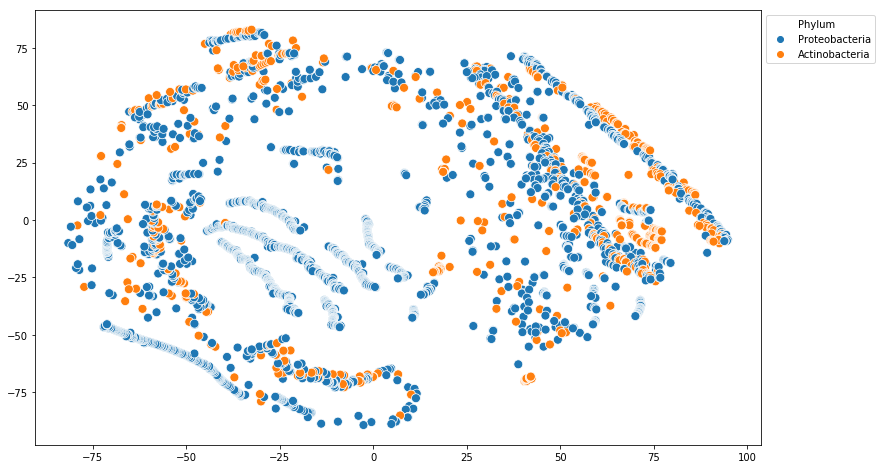

In [44]:
import seaborn as sns
plt.figure(figsize=(13,8))
no_bacteroid = [not i == "Bacteroidetes" for i in kpcof_plot.Phylum]
no_sr1  = [not i == "SR1" for i in kpcof_plot.Phylum]
no_eu  = [not i == "Euryarchaeota" for i in kpcof_plot.Phylum]

proteo = [i == "Proteobacteria" for i in kpcof_plot.Phylum]
bacter = [i == "Bacteroidetes" for i in kpcof_plot.Phylum]
firm = [i == "Firmicutes" for i in kpcof_plot.Phylum]
actino = [i == "Actinobacteria" for i in kpcof_plot.Phylum]
#no_clostridia = [not i == "Clostridia" for i in kpcof_plot.Class]
#keep = [i and j for i,j in zip(no_bacteroid, no_clostridia) ]
keep = [True for i in kpcof_plot.Phylum]
#keep = [i or j  for i,j in zip(proteo, actino)]

tsne_keep = tsne[keep, :]
kpcof_plot_keep = kpcof_plot.loc[keep, :]
#g = sns.scatterplot(tsne[keep,0], tsne[keep, 1], data = kpcof_plot.loc[keep, :], hue = "Phylum", s= 80)
j = 26000
g = sns.scatterplot(tsne_keep[0:j, 0], tsne_keep[0:j, 1], data = kpcof_plot_keep.iloc[0:j, :], hue = "Phylum", s= 80)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
pca_trans = pca.fit_transform(qual_vecs.transpose())

In [93]:
print(qual_vecs.shape)
np.sum([i == j for i,j in zip(kpcof.index.values, qual_vecs.index.values)])

(26726, 100)


26726

In [101]:
#Color by pathway category
prop_pathway = pd.read_csv("C:/Users/ctata/Documents/Lab/quality_vectors_final/data/pathways/property_pathway_dict.txt", sep = "\t")
plt.figure(figsize=(13,8))
sns.scatterplot(pca_trans[:, 0], pca_trans[:, 1], s = 200, data = prop_pathway, hue = "pathway_category")
plt.legend(bbox_to_anchor=(1, 1), loc=2)
#Problem is there is not just one pathway that correlates signficantly. A property is not a single pathway,
# it's a combination of pathways that dictates co-occurrence

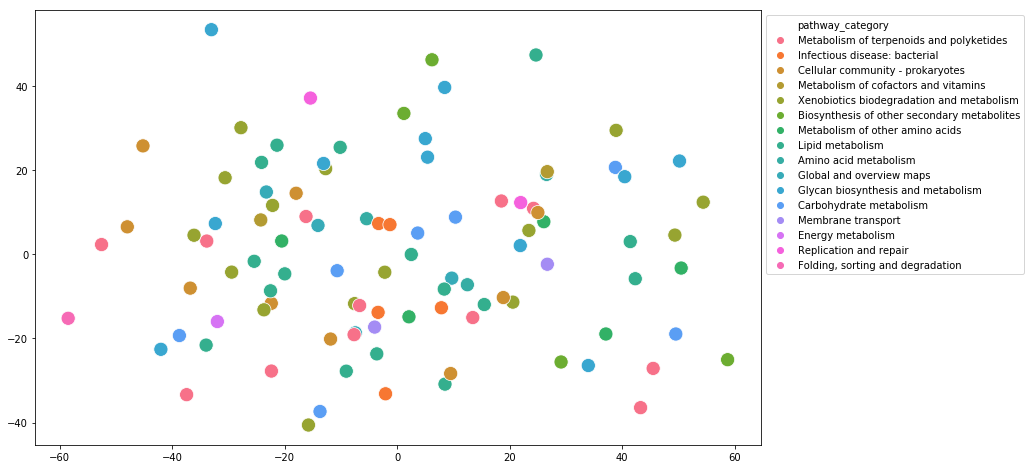

In [109]:
#Color by highest valued taxa
asv_def = qual_vecs.idxmax(axis = 0).values
kpcof_def = kpcof.loc[asv_def]
sns.scatterplot(pca_trans[:, 0], pca_trans[:, 1], s = 200, data = kpcof_def, hue = "Phylum")
plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [131]:
pathway_cat = pd.read_csv("C:/Users/ctata/Documents/Lab/quality_vectors_final/data/pathways/pathway_category.txt", 
                          sep = "\t", index_col = 1, header = None, dtype = str)
pathway_cat
pathway_associations = pd.read_csv("C:/Users/ctata/Documents/Lab/quality_vectors_final/data/pathways/property_pathway_dict_allsig.txt", sep = "\t")
pathway_cat.loc[pathway_associations.path_name, :]



c:\users\ctata\miniconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,property,path_id,path_name,corr_val
0,property_100_1,281,Citrate cycle (TCA cycle),0.198269
1,property_100_1,2030,Lysine degradation,0.193289
2,property_100_1,71,Histidine metabolism,0.191244
3,property_100_1,903,Phenylalanine metabolism,0.182869
4,property_100_1,592,Tryptophan metabolism,0.179675
5,property_100_1,410,beta-Alanine metabolism,0.178994
6,property_100_1,2040,Cyanoamino acid metabolism,0.176195
7,property_100_1,360,Glutathione metabolism,0.168418
8,property_100_1,361,Streptomycin biosynthesis,0.164479
9,property_100_1,623,Polyketide sugar unit biosynthesis,0.159531


In [133]:
np.unique(pathway_associations.property)

array(['property_100_1', 'property_100_2', 'property_100_3'], dtype=object)

In [142]:
#boxplot properties by their taxa categorizations

kpcof.loc[qual_vecs.index.values, "Phylum"]


Seq
TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTA     Proteobacteria
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCG      Bacteroidetes
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCGGACGCTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGGTGTCTTGAGTACAGTAGAGGCAGGCG      Bacteroidetes
AACGTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCTATGGGCTCAACCCATAAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCG         Firmicutes
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATGTCTTGAGTGCAGTTGAGGCAGGCG      Bacteroidetes
TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTCTGTCAAGTCGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCGAAACTGGCAGGCTAGAGTCTTGTAGAGGGGGGTA     Proteobacteria
AACGTAGGTCACAAGCGTTGTCCGGAATTACTGGGT